In [1]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np

iris_X, iris_y = ds.load_iris(return_X_y=True)
labels = ("Setosa", "Versicolor", "Virginica")

df = pd.DataFrame(iris_X, columns=["Sepal length", "Sepal width",
                                   "Petal length", "Petal width"])
df['Class'] = iris_y
df['Class'] = df['Class'].map(lambda c: labels[c])
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
iris_X_2d = pca_2d.fit_transform(iris_X)

import plotly.graph_objects as go

def gr_dataset(fig): 
    for lab, col in enumerate(("red", "green", "blue")):
        fig.add_trace(go.Scatter(x=iris_X_2d[iris_y==lab, 0],
                                 y=iris_X_2d[iris_y==lab, 1],
                                 mode="markers",
                                 marker_color=col,
                                 name=labels[lab]))

fig = go.Figure()
gr_dataset(fig)
f = go.FigureWidget(fig)
f.show()

In [9]:
def gr_membership_contour(estimated_membership, colorscale):
    fig = go.Figure()
    gr_dataset(fig)
    x = np.linspace(-4, 4, 30)
    y = np.linspace(-1.5, 1.5, 30)
    X, Y = np.meshgrid(x, y)
    zs = estimated_membership(np.array((np.ravel(X), np.ravel(Y))).T)
    Z = zs.reshape(X.shape)

    fig.add_trace(go.Contour(x=x, y=y, z=Z,
                             colorscale=colorscale,
                             line_smoothing=0.85,
                             contours={"start": 0.5, "end": 0.5, "size": .1,
                                       "showlabels": True,
                                       "labelfont": {"size": 12,
                                                     "color": "white"}
                                       },
                             showscale=False))
    go.FigureWidget(fig).show("svg")

colorscale_setosa = [[0, 'rgba(0.1, 0, 0, 0.0)'],
                     [1, 'rgba(0.9, 0, 0, 0.5)']]

colorscale_versicolor = [[0, 'rgba(0, 0.1, 0, 0.0)'],
                         [1, 'rgba(0, 0.9, 0, 0.5)']]

colorscale_virginica = [[0, 'rgba(0, 0, 0.1, 0.0)'],
                        [1, 'rgba(0, 0, 0.9, 0.5)']]

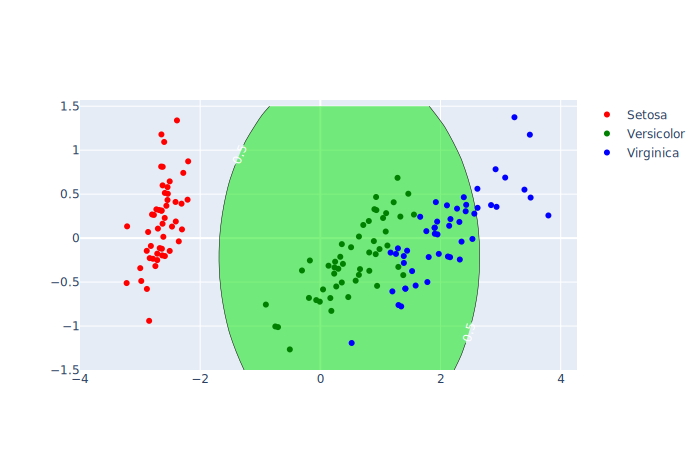

In [19]:
from mulearn import FuzzyInductor
from mulearn.kernel import GaussianKernel, LinearKernel
from mulearn.fuzzifier import ExponentialFuzzifier, LinearFuzzifier

versicolor_y_crisp = [0]*50 + [1]*50 + [0]*50

fi_versicolor = FuzzyInductor(k=LinearKernel(),
                              fuzzifier=LinearFuzzifier(),
                              c=0.1)
fi_versicolor.fit(iris_X_2d, versicolor_y_crisp)
gr_membership_contour(fi_versicolor.predict, colorscale=colorscale_versicolor)

In [16]:
1/149

0.006711409395973154